In [1]:
from scipy import io
from pathlib import Path

import numpy as np
rng = np.random.default_rng()

import jax.numpy as jnp
import jax.random as jr

import optax

from collections import defaultdict
import pickle as pkl

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from dynamax.hidden_markov_model import LinearRegressionHMM
from dynamax.utils.plotting import gradient_cmap

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [20]:
import pandas as pd

In [2]:
# A training cache to store all the models and their parameters
training_cache = defaultdict(dict)

# DS to store the models organized
class Model_Store:
    subject_id: int
    n_states: int
    fit_model: None
    fit_params: None
    lps: None
    valid_mllk: None

In [3]:
loaded_cache = pkl.load(open('all_subject_coh_high_trained.pkl', 'rb'))

In [4]:
loaded_cache[0][2].lps

Array([ 1.1785625 ,  1.1779946 ,  1.1774274 , ..., -0.13659753,
       -0.13676393, -0.13693015], dtype=float32)

In [ ]:
# SGD

for i in range(13):
    plt.figure(figsize=(4, 4))
    
    for x in range(2,7):
        plt.plot(loaded_cache[i][x].lps, "--")
    plt.legend(range(2, 7))
    # plt.ylim(-2, 2)
    plt.xlim(0, 5000)
    plt.title("subject {}, SGD Loss".format(i))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    # plt.savefig("sgd_loss.eps", format="eps")

In [24]:
loaded_cache[0][4].fit_params.emissions.weights.shape

(4, 4, 3)

In [ ]:
emission_dimensions = ["resp_x", "resp_y", "vel", "acc"]
for x in range(13):
    for y in range(4):
        # Make this in 2x2 subplots
        plt.subplot(2, 2, y+1)

        plt.plot(loaded_cache[x][4].fit_params.emissions.weights[:,y,:].T)
        plt.title("Subject {}, weights for {}".format(x,emission_dimensions[y]))
        plt.xlabel("inputs")
        plt.ylabel("weights")
        plt.xticks(range(3), ["Stim X", "Stim Y", "Bias"])
        plt.legend(list(range(4)))
        plt.tight_layout()
    
    plt.show()


        # pd.DataFrame(loaded_cache[x][4].fit_params.emissions.weights[:,y,:], 
        #             columns=["Stim X", "Stim Y", "Bias"]).T.plot.line()

        # plt.xlabel("inputs")
        # plt.ylabel("weights")
        # plt.title("Subject {}, 4 states".format(x))

# low coh

In [36]:
loaded_cache = pkl.load(open('all_subject_coh_low_trained.pkl', 'rb'))

In [37]:
loaded_cache[0][2].lps

Array([ 1.1792375 ,  1.1786584 ,  1.1780804 , ..., -0.17082745,
       -0.17100684, -0.1711861 ], dtype=float32)

In [ ]:
# SGD

for i in range(13):
    plt.figure(figsize=(4, 4))
    
    for x in range(2,7):
        plt.plot(loaded_cache[i][x].lps, "--")
    plt.legend(range(2, 7))
    # plt.ylim(-2, 2)
    plt.xlim(0, 5000)
    plt.title("subject {}, SGD Loss".format(i))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    # plt.savefig("sgd_loss.eps", format="eps")

In [ ]:
# SGD

for i in range(13):
    plt.figure(figsize=(4, 4))
    
    for x in range(2,7):
        plt.plot(loaded_cache[i][x].lps, "--")
    plt.legend(range(2, 7))
    # plt.ylim(-2, 2)
    plt.xlim(0, 5000)
    plt.title("subject {}, SGD Loss".format(i))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    # plt.savefig("sgd_loss.eps", format="eps")

In [39]:
loaded_cache[0][4].fit_params.emissions.weights.shape

(4, 4, 3)

In [ ]:
emission_dimensions = ["resp_x", "resp_y", "vel", "acc"]
for x in range(13):
    for y in range(4):
        # Make this in 2x2 subplots
        plt.subplot(2, 2, y+1)

        plt.plot(loaded_cache[x][4].fit_params.emissions.weights[:,y,:].T)
        plt.title("Subject {}, weights for {}".format(x,emission_dimensions[y]))
        plt.xlabel("inputs")
        plt.ylabel("weights")
        plt.xticks(range(3), ["Stim X", "Stim Y", "Bias"])
        plt.legend(list(range(4)))
        plt.tight_layout()
    
    plt.show()


        # pd.DataFrame(loaded_cache[x][4].fit_params.emissions.weights[:,y,:], 
        #             columns=["Stim X", "Stim Y", "Bias"]).T.plot.line()

        # plt.xlabel("inputs")
        # plt.ylabel("weights")
        # plt.title("Subject {}, 4 states".format(x))

# Avg

In [42]:
loaded_high_cache = pkl.load(open('all_subject_coh_high_trained.pkl', 'rb'))
loaded_low_cache = pkl.load(open('all_subject_coh_low_trained.pkl', 'rb'))

In [47]:
high_4_state_losses = []

for i in range(13):
    high_4_state_losses.append(loaded_high_cache[i][4].lps)

In [48]:
low_4_state_losses = []

for i in range(13):
    low_4_state_losses.append(loaded_low_cache[i][4].lps)

Text(0, 0.5, 'Loss')

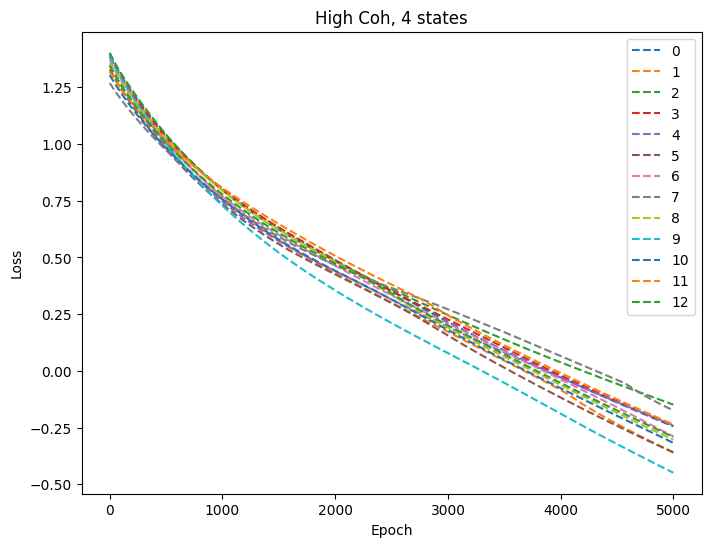

In [52]:
# Plot the losses of all the subjects

plt.figure(figsize=(8, 6))
plt.plot(np.array(high_4_state_losses).T, "--")
plt.legend(range(13))
plt.title("High Coh, 4 states")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# legend outside the plot


Text(0, 0.5, 'Loss')

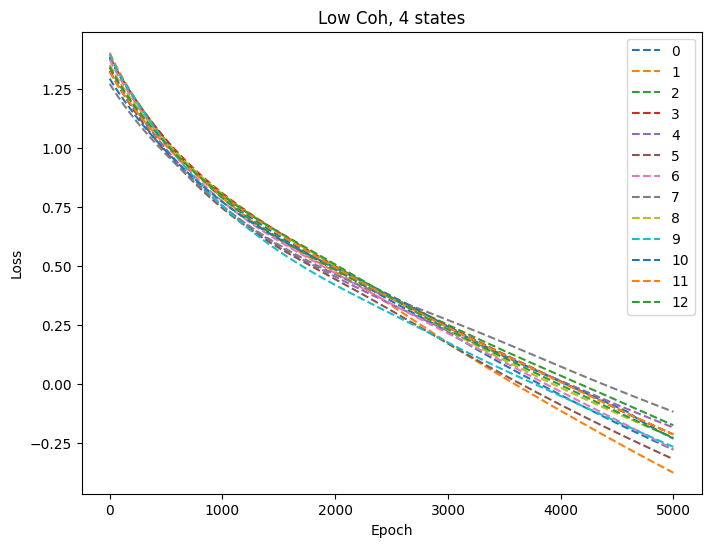

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(np.array(low_4_state_losses).T, "--")
plt.legend(range(13))
plt.title("Low Coh, 4 states")
plt.xlabel("Epoch")
plt.ylabel("Loss")

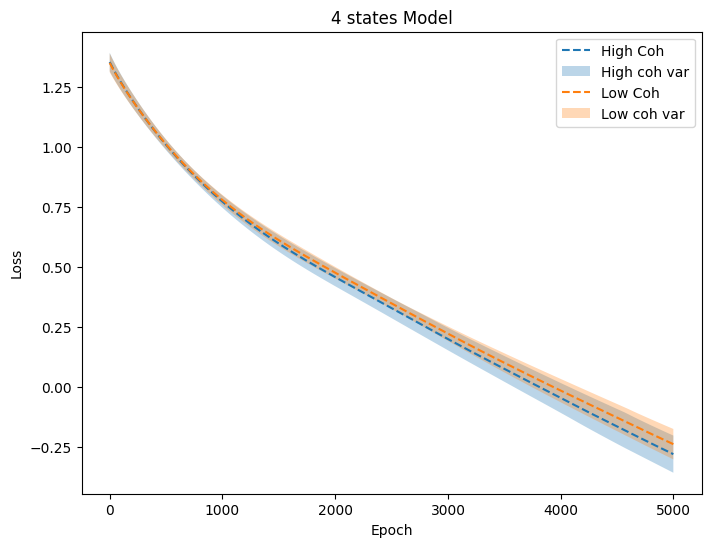

In [61]:
# plot the average of the high and low in 1 plot
# with mean and std

plt.figure(figsize=(8, 6))
plt.plot(np.mean(np.array(high_4_state_losses), axis=0), "--")
plt.fill_between(range(5000), 
                 np.mean(np.array(high_4_state_losses), axis=0) - np.std(np.array(high_4_state_losses), axis=0),
                 np.mean(np.array(high_4_state_losses), axis=0) + np.std(np.array(high_4_state_losses), axis=0),
                 alpha=0.3)
plt.plot(np.mean(np.array(low_4_state_losses), axis=0), "--")
plt.fill_between(range(5000), 
                 np.mean(np.array(low_4_state_losses), axis=0) - np.std(np.array(low_4_state_losses), axis=0),
                 np.mean(np.array(low_4_state_losses), axis=0) + np.std(np.array(low_4_state_losses), axis=0),
                 alpha=0.3)
plt.title("4 states Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["High Coh", "High coh var", "Low Coh", "Low coh var"])

In [8]:
loaded_cache["ET_HMM"][2].fit_params.emissions.weights

Array([[[ 0.216029  ,  0.02790617,  0.01633381,  0.03509545,
          1.3987256 ]],

       [[ 0.06578622, -0.02190064,  0.04457312,  0.00982139,
          0.39937398]]], dtype=float32)

In [9]:
import pandas as pd
#   - 1st column: Stimulus (calibrated)
#   - 2nd column: Coherence
#   - 3rd column: Attention
#   - 4th column: Expectation (calibrated)

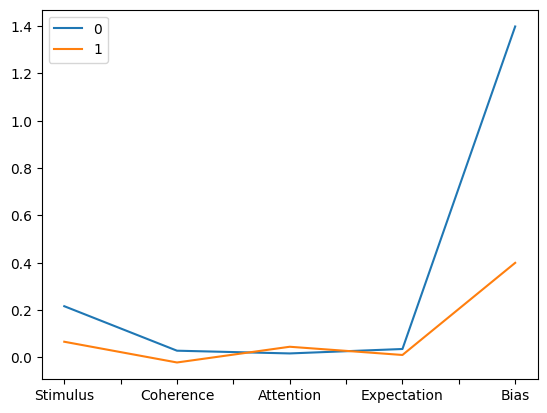

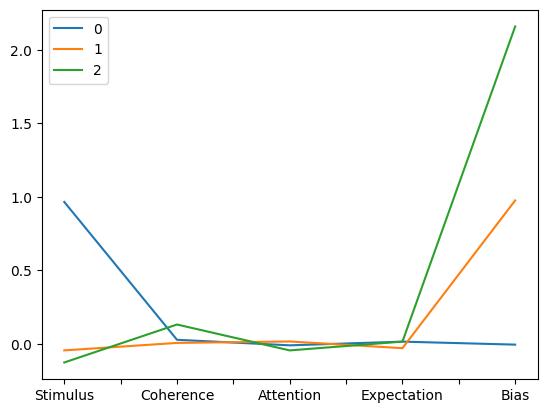

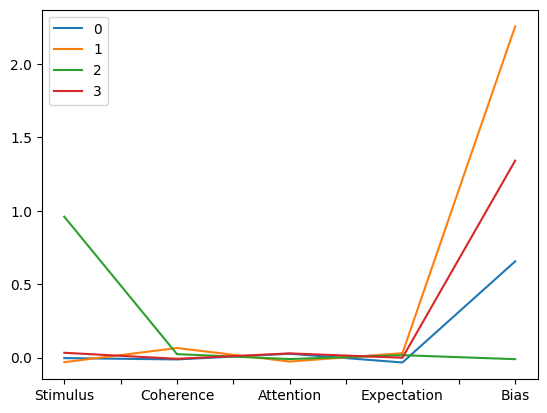

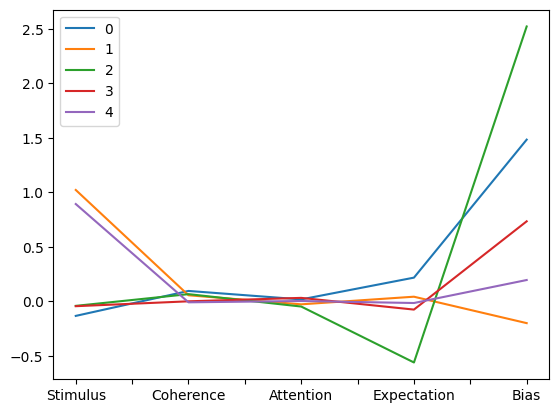

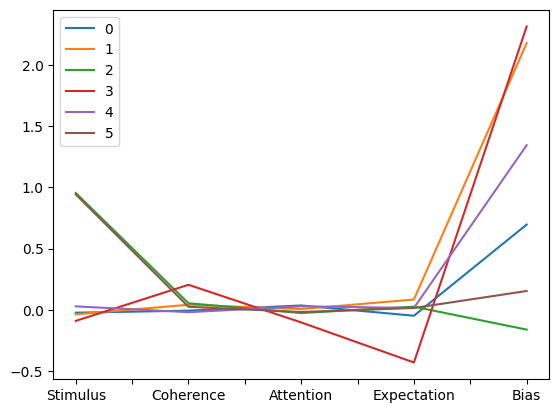

In [10]:
for x in range(2,7):
    pd.DataFrame(loaded_cache["ET_HMM"][x].fit_params.emissions.weights[:,0,:], 
                 columns=["Stimulus", "Coherence", "Attention", "Expectation", "Bias"]).T.plot.line()

In [11]:
tm_et = loaded_cache["ET_HMM"][4].fit_params.transitions.transition_matrix
tw_et = loaded_cache["ET_HMM"][4].fit_params.transitions.transition_weights

In [12]:
tm_et

Array([[0.04887042, 0.54281855, 0.17207065, 0.2362404 ],
       [0.65280056, 0.26116323, 0.06902494, 0.01701125],
       [0.03294595, 0.0073196 , 0.8997518 , 0.05998273],
       [0.21167773, 0.09574901, 0.45004818, 0.24252509]], dtype=float32)

In [13]:
tw_et

Array([[-0.00474295, -0.00181616,  0.00908132,  0.01618188,  0.00361727],
       [-0.00874161, -0.02615204,  0.0173904 ,  0.01240448,  0.00147704],
       [ 0.00109061, -0.00367851, -0.00543716, -0.00289312, -0.00458931],
       [ 0.01859531,  0.00372585,  0.00073685, -0.00293741,  0.00642159]],      dtype=float32)

In [14]:
tm = loaded_cache["E_HMM"][4].fit_params.transitions.transition_matrix
tm

Array([[0.33699033, 0.04537826, 0.13770638, 0.47992495],
       [0.01595717, 0.7239779 , 0.23289703, 0.02716786],
       [0.05090712, 0.3581827 , 0.45742762, 0.1334826 ],
       [0.4901828 , 0.09821837, 0.1699269 , 0.2416719 ]], dtype=float32)

In [15]:
tw_et_pd = pd.DataFrame(tw_et, columns=["Stimulus", "Coherence", "Attention", "Expectation", "Bias"])

<Axes: >

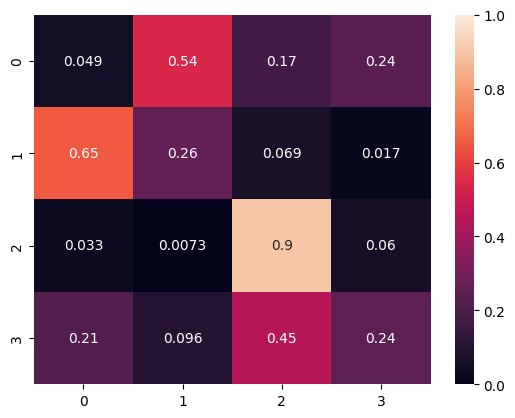

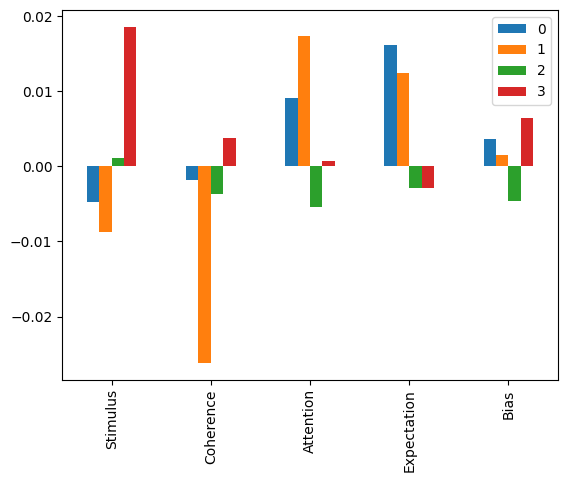

In [16]:
sns.heatmap(tm_et, annot=True, vmax=1, vmin=0)

tw_et_pd.T.plot.bar()

<Axes: >

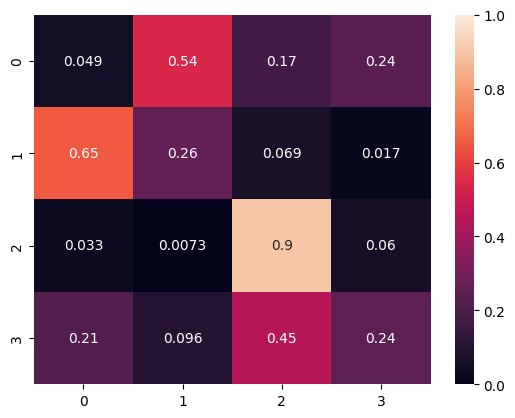

In [17]:
sns.heatmap(tm_et, annot=True, vmax=1, vmin=0)